In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\machineWithPython\\newYorkCityAirbnb\\AB_NYC_2019.csv')
df.shape

(48895, 16)

In [12]:
data = df.drop(['id','name','host_id','last_review'], axis = 1,inplace=True)
df.shape

(48895, 12)

In [14]:
df.isnull().sum()

host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
df[['reviews_per_month', 'host_name']] = df[['reviews_per_month', 'host_name']].replace("?", np.nan)

df['host_name'] = df['host_name'].fillna('Unknown')

df['reviews_per_month'] = df['reviews_per_month'].astype(float)
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [19]:
df.isnull().sum()

host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [22]:
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


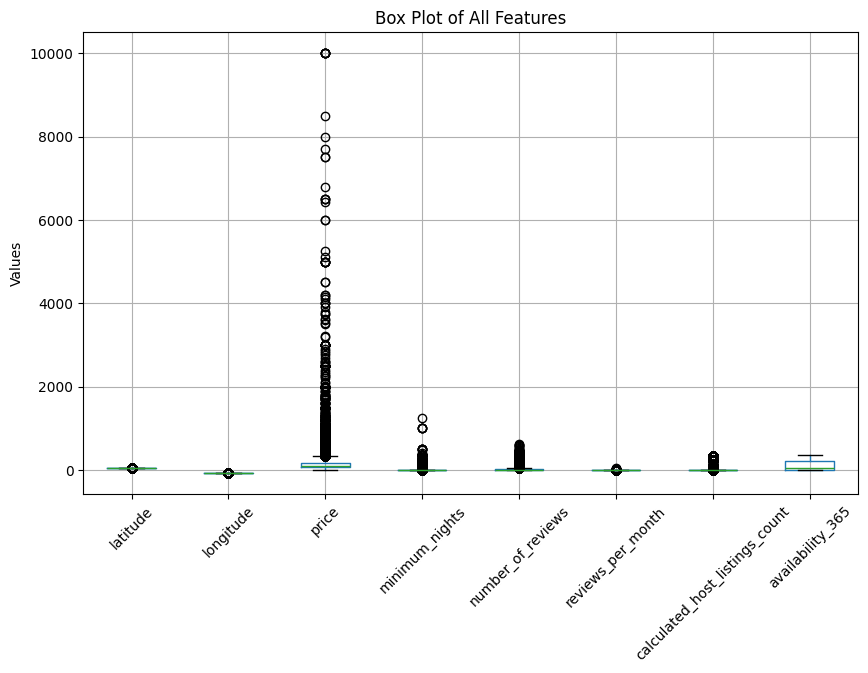

In [24]:
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

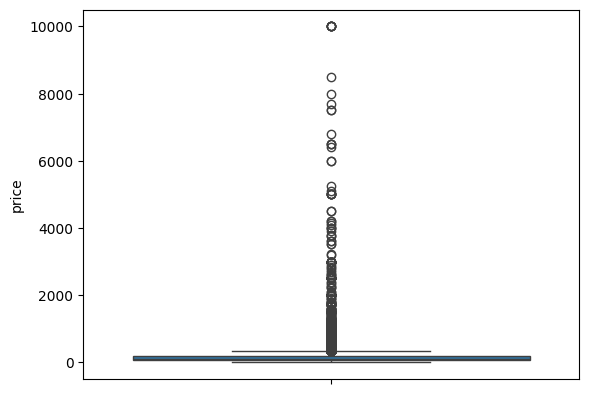

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['price'])
plt.show()

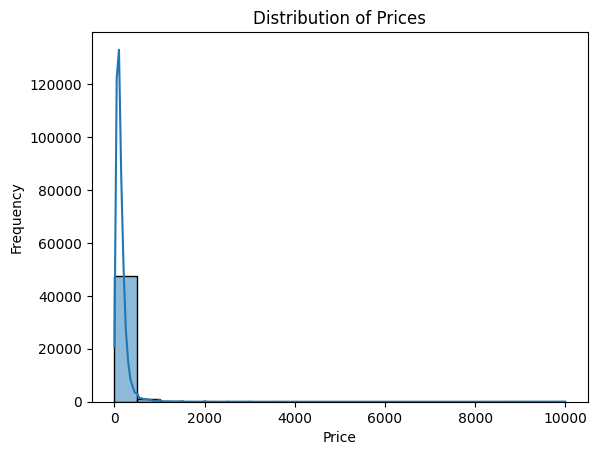

In [27]:
import seaborn as sns

sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [33]:
df = df[(df['price'] > 0) & (df['price'] <= 1000)]
df = df[df['minimum_nights'] <= 365]
df = df[df['availability_365'] > 0]

In [34]:
df['price_log'] = np.log1p(df['price'])  
df['minimum_nights_log'] = np.log1p(df['minimum_nights'])
df['number_of_reviews_log'] = np.log1p(df['number_of_reviews'])
df['calculated_host_listings_count_log'] = np.log1p(df['calculated_host_listings_count'])

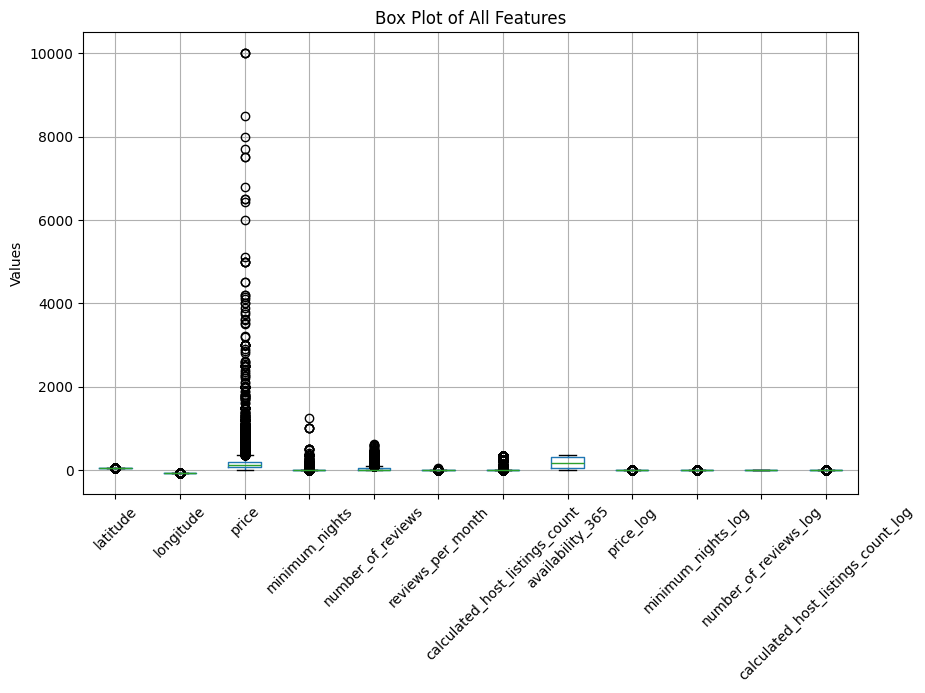

In [35]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

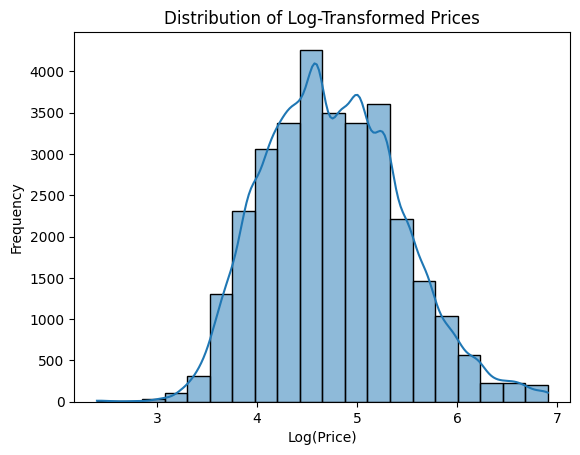

In [39]:
sns.histplot(data=df, x='price_log', bins=20, kde=True)
plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

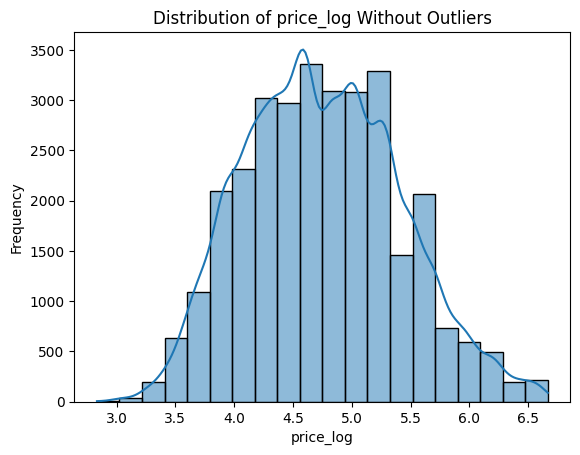

In [40]:
Q1 = df['price_log'].quantile(0.25)
Q3 = df['price_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outlier prices
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df_cleaned = df[(df['price_log'] >= lower_bound) & (df['price_log'] <= upper_bound)]

# Visualize the cleaned data
sns.histplot(data=df_cleaned, x='price_log', bins=20, kde=True)
plt.title("Distribution of price_log Without Outliers")
plt.xlabel("price_log")
plt.ylabel("Frequency")
plt.show()

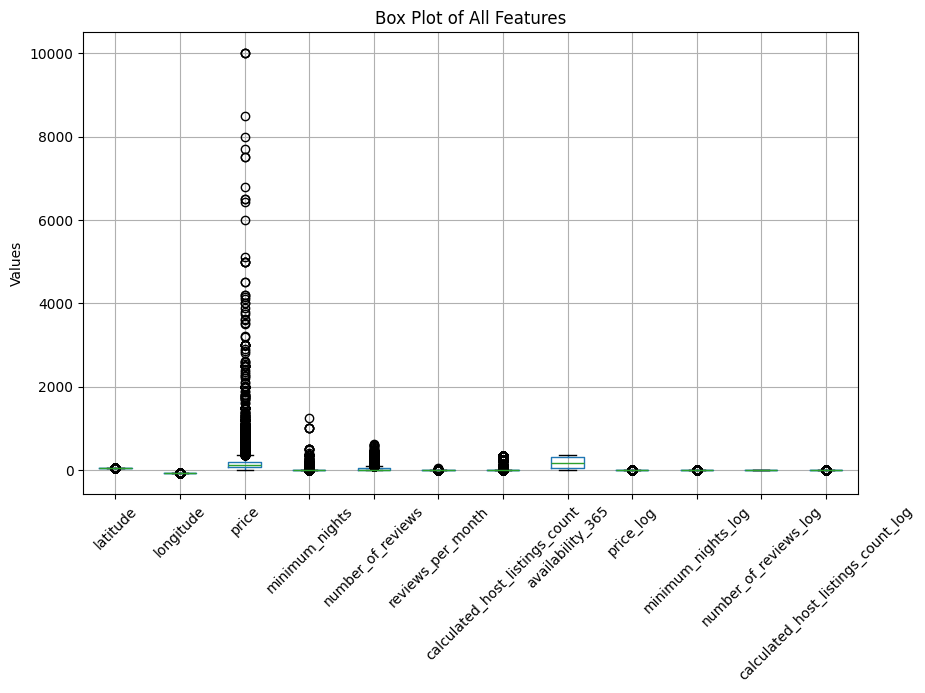

In [41]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

In [42]:
df.drop(columns=['price','minimum_nights','number_of_reviews','calculated_host_listings_count'], inplace=True)

In [43]:
df.head(20)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,availability_365,price_log,minimum_nights_log,number_of_reviews_log,calculated_host_listings_count_log
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.210000,365,5.010635,0.693147,2.302585,1.945910
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.380000,355,5.420535,0.693147,3.828641,1.098612
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,1.373221,365,5.017280,1.386294,0.000000,0.693147
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.640000,194,4.499810,0.693147,5.602119,0.693147
5,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,0.590000,129,5.303305,1.386294,4.317488,0.693147
7,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,3.470000,220,4.382027,1.098612,6.066108,0.693147
9,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1.330000,188,5.017280,0.693147,5.081404,1.609438
10,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,0.430000,6,4.912655,1.791759,3.988984,0.693147
11,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,1.500000,39,4.454347,1.098612,5.241747,0.693147
12,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,1.340000,314,4.499810,1.609438,5.123964,1.386294


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['price_log', 'minimum_nights_log', 'reviews_per_month','availability_365','number_of_reviews_log','calculated_host_listings_count_log']] = scaler.fit_transform(
    df[['price_log', 'minimum_nights_log', 'reviews_per_month','availability_365','number_of_reviews_log','calculated_host_listings_count_log']]
)

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['host_name'] = encoder.fit_transform(df['host_name'])
df['neighbourhood_group'] = encoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = encoder.fit_transform(df['neighbourhood'])
df['room_type'] = encoder.fit_transform(df['room_type'])

In [46]:
df.head(20)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,availability_365,price_log,minimum_nights_log,number_of_reviews_log,calculated_host_listings_count_log
0,3603,1,107,40.64749,-73.97237,1,0.210000,365,5.010635,0.693147,2.302585,1.945910
1,3444,2,126,40.75362,-73.98377,0,0.380000,355,5.420535,0.693147,3.828641,1.098612
2,2092,2,93,40.80902,-73.94190,1,1.373221,365,5.017280,1.386294,0.000000,0.693147
3,4466,1,40,40.68514,-73.95976,0,4.640000,194,4.499810,0.693147,5.602119,0.693147
5,1374,2,136,40.74767,-73.97500,0,0.590000,129,5.303305,1.386294,4.317488,0.693147
7,6937,2,94,40.76489,-73.98493,1,3.470000,220,4.382027,1.098612,6.066108,0.693147
9,861,2,34,40.71344,-73.99037,0,1.330000,188,5.017280,0.693147,5.081404,1.609438
10,4324,2,200,40.80316,-73.96545,0,0.430000,6,4.912655,1.791759,3.988984,0.693147
11,3898,2,94,40.76076,-73.98867,1,1.500000,39,4.454347,1.098612,5.241747,0.693147
12,4272,1,180,40.66829,-73.98779,1,1.340000,314,4.499810,1.609438,5.123964,1.386294


In [48]:
x = df.iloc[:, list(range(0, 8)) + list(range(9, 12))].values
y = df.iloc[:, 8].values

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [99]:
knn_regressor = KNeighborsRegressor(n_neighbors=17)
knn_regressor.fit(X_train, Y_train)


KNeighborsRegressor(n_neighbors=17)

In [100]:
Y_pred = knn_regressor.predict(X_test)


In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)  
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.43567585146377447
R-squared Score: 0.0699516328618589
Mean Absolute Error: 0.5199072444381082


In [102]:
Trial_Data = np.array([[4000, 2, 210, 39, -75 , 1, 4, 150, 0.6, 2.5, 1.6]])
predicted_price = knn_regressor.predict(Trial_Data)[0]
print(f"Predicted Price: {predicted_price}")

Predicted Price: 4.4751399977773785
